# Phân tích mức tiêu hao nhiên liệu

## 1. ĐỌC DỮ LIỆU

Dữ liệu `mpg.csv` gồm các thông tin như sau:

- **mpg**: Miles/(US) gallon số gallon xăng trên 1 dặm
- **cylinders:** số lượng xilanh
- **displacement:**  Displacement/ dung tích xilanh (cu.in / $inches^3$)
- **horsepower:** công suất theo mã lực
- **weight:** trọng lượng (pound)
- **acceleration:** Gia tốc
- **model_year:** Năm sản xuất
- **origin:** Xuất xứ
- **name:** Tên dòng xe


In [2]:
import pandas as pd
mpg_sql = pd.read_csv('C:\\Users\\Hung Anh\\Downloads\\BtthTKMTVUD\\TKMT_lab_03\\TKMT_lab_03_EDA\\TKMT_lab_03_EDA\\mpg.csv')


## 2. TÌM HIỂU DỮ LIỆU

### 2.1 Kiểm tra có dòng nào không có dữ liệu?

In [3]:
mpg_sql.shape

(398, 9)

### 2.2 Xóa các dòng không có dữ liệu


In [7]:

mpg_sql = mpg_sql.dropna() #xóa những dòng không có dữ liệu

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    False      False         False       False   False         False   
1    False      False         False       False   False         False   
2    False      False         False       False   False         False   
3    False      False         False       False   False         False   
4    False      False         False       False   False         False   
..     ...        ...           ...         ...     ...           ...   
393  False      False         False       False   False         False   
394  False      False         False       False   False         False   
395  False      False         False       False   False         False   
396  False      False         False       False   False         False   
397  False      False         False       False   False         False   

     model_year  origin   name  
0         False   False  False  
1         False   False  False  
2         False   False 

### 2.3 Tìm trung binh, trung vị của các thuộc tính: 'cylinders', 'horsepower', 'weight'

In [9]:
#trung bình của thuộc tính cylinders, horsepower và weight băng mean trong python
mean_cylinders = mpg_sql['cylinders'].mean()
mean_horsepower = mpg_sql['horsepower'].mean()
mean_weight = mpg_sql['weight'].mean()
#trung vị của thuộc tích 
median_cylinders = mpg_sql['cylinders'].median()
median_horsepower = mpg_sql['horsepower'].median()
median_weight = mpg_sql['weight'].median()

print("Trung bình và trung vị của cylinders: " + str(mean_cylinders) +" ," + str(median_cylinders))
print("Trung bình và trung vị của horsepower: " + str(mean_horsepower) +" ," + str(median_horsepower))
print("Trung bình và trung vị của weight: " + str(mean_weight) +" ," + str(median_weight))

Trung bình và trung vị của cylinders: 5.471938775510204 ,4.0
Trung bình và trung vị của horsepower: 104.46938775510205 ,93.5
Trung bình và trung vị của weight: 2977.5841836734694 ,2803.5


### 2.4 Tìm miền giá trị và miền phân vị của thuộc tính 'mpg'

In [11]:
#miền giá trị
print("Miền giá trị của thuộc tính mpg là: " + str(mpg_sql['mpg'].describe()))
#miền phân vị
print("Miền Phân vị của thuộc tính mpg là: " + str(mpg_sql['mpg'].quantile()))

Miền giá trị của thuộc tính mpg là: count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
Miền Phân vị của thuộc tính mpg là: 22.75


## 3. SO SÁNH MỨC TIÊU HAO NHIÊN LIỆU TRUNG BÌNH CỦA CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

So sánh mức tiêu hao nhiên liệu trung bình của các dòng xe Mỹ, Nhật và Châu Âu

In [13]:
big_fuel_more_than_car = mpg_sql.groupby(['origin'])['mpg'].mean()
print(big_fuel_more_than_car)

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64


## 4. VẼ HISTOGRAM TRỌNG LƯỢNG CÁC XE

<function matplotlib.pyplot.show(close=None, block=None)>

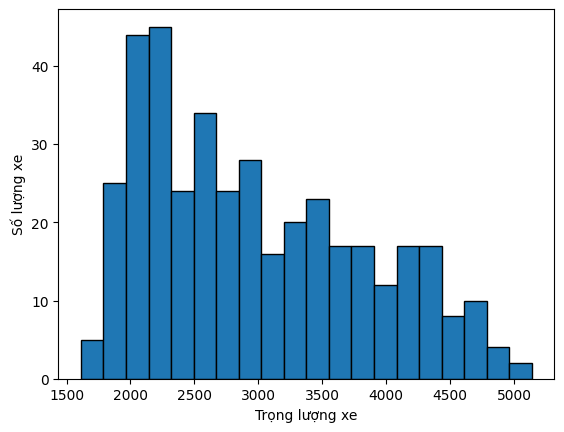

In [15]:
import matplotlib.pyplot as plt
plt.hist(mpg_sql['weight'],bins= 20,edgecolor='black')
plt.xlabel('Trọng lượng xe')
plt.ylabel('Số lượng xe')
plt.show()

## 5. TÍNH TỶ LỆ CÁC DÒNG XE DỰA TRÊN XUẤT XỨ

In [33]:
percent_carorigin_value = mpg_sql['origin'].value_counts()
percent_carorigin_index = percent_carorigin_value.index
print(percent_carorigin_index[0] + ": " + str(percent_carorigin_value[0]/mpg_sql['origin'].count()*100))
print(percent_carorigin_index[1] + ": " + str(percent_carorigin_value[1]/mpg_sql['origin'].count()*100))
print(percent_carorigin_index[2] + ": " + str(percent_carorigin_value[2]/mpg_sql['origin'].count()*100))

usa: 62.5
japan: 20.153061224489797
europe: 17.346938775510203


## 6. VẼ BOXPLOT SO SÁNH CÔNG SUẤT CỦA CÁC DÒNG XE THẬP NIÊN 70, 80

Lưu ý: Các dòng xe thập niên 70 (1970 - 1979), thập niên 80 (1980 - 1989)

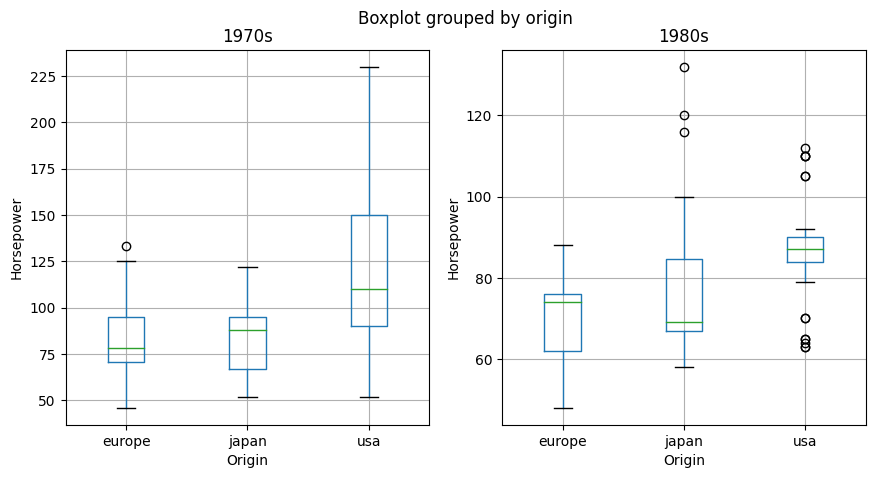

In [60]:
# mpg_sql_70s =mpg_sql[(mpg_sql['model_year'] >= 70) & (mpg_sql['model_year'] < 80)]
# result_70 =mpg_sql_70s.groupby(['origin'])['horsepower'].mean()
# mpg_sql_80s =mpg_sql[(mpg_sql['model_year'] >= 80) & (mpg_sql['model_year'] < 90)]
# result_80 =mpg_sql_80s.groupby(['origin'])['horsepower'].mean()

# result_70_df = pd.DataFrame({'origin': result_70.index, 'mean_horsepower_70s': result_70.values})
# result_80_df = pd.DataFrame({'origin': result_80.index, 'mean_horsepower_80s': result_80.values})

# # Ghép hai DataFrame thành một bảng dữ liệu
# merged_df = result_70_df.merge(result_80_df, on='origin')

# # Vẽ biểu đồ cột so sánh trung bình công suất của các dòng xe theo xuất xứ giữa hai thập kỷ 70 và 80
# merged_df.plot(x='origin', kind='bar', rot=0)
# plt.title('Mean horsepower comparison between 70s and 80s')
# plt.xlabel('Origin')
# plt.ylabel('Mean horsepower')
# plt.legend(['70s', '80s'])
# plt.show()
# plt.boxplot()
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

mpg_sql_70s.boxplot(column='horsepower', by='origin', ax=axs[0])
axs[0].set_title('1970s')
axs[0].set_xlabel('Origin')
axs[0].set_ylabel('Horsepower')


mpg_sql_80s.boxplot(column='horsepower', by='origin', ax=axs[1])
axs[1].set_title('1980s')
axs[1].set_xlabel('Origin')
axs[1].set_ylabel('Horsepower')



plt.show()

## 7. KHẢO SÁT MỨC TIÊU HAO NHIÊN LIỆU

### 7.1 Với số lượng xi lanh

Thử vẽ bằng đồ thị scatter plot.

cylinders
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: mpg, dtype: float64


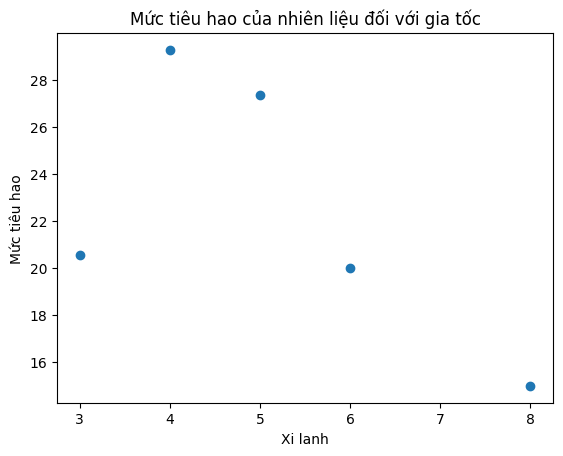

In [104]:
groupby_fuel_cylinder = mpg_sql.groupby(['cylinders'])['mpg'].mean()
print(groupby_fuel_cylinder)

plt.scatter(groupby_fuel_cylinder.index,groupby_fuel_cylinder.values)
plt.xlabel('Xi lanh')
plt.ylabel('Mức tiêu hao')
plt.title('Mức tiêu hao của nhiên liệu đối với gia tốc')
plt.show()

### 7.2 Với công suất theo mã lực

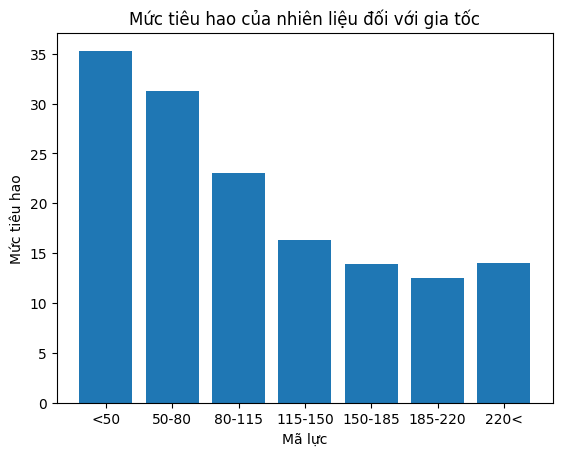

In [105]:
# groupby_fuel_horsepowers = mpg_sql.groupby(['horsepower'])['mpg'].mean()
# plt.bar(groupby_fuel_horsepowers.index,groupby_fuel_horsepowers.values)
# plt.xlabel('Mã lực')
# plt.ylabel('Mức tiêu hao')
# plt.title('Mức tiêu hao của mã lực đối với nhiên liệu')
# plt.show()
#cách này không hiệu quả vì nếu quá nhiều dữ liệu biểu đồ sẽ rất khó nhìn !!!
binss = [45,50, 80, 115, 150, 185, 220,250]
labelss = ['<50', '50-80','80-115','115-150','150-185','185-220','220<']
mpg_sql['horsepowers_group'] = pd.cut(mpg_sql['horsepower'], bins=binss, labels=labelss)
groupby_fuel_horsepowers = mpg_sql.groupby(['horsepowers_group'])['mpg'].mean()
plt.bar(groupby_fuel_horsepowers.index,groupby_fuel_horsepowers.values)
plt.xlabel('Mã lực')
plt.ylabel('Mức tiêu hao')
plt.title('Mức tiêu hao của nhiên liệu đối với gia tốc')
plt.show()


### 7.3 Với gia tốc

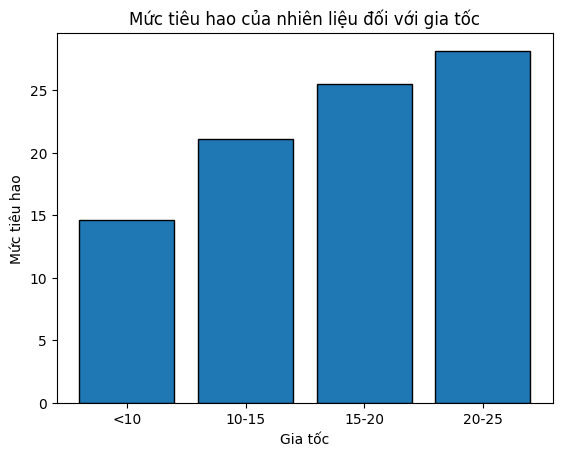

In [106]:
# groupby_fuel_acceleration = mpg_sql.groupby(['acceleration'])['mpg'].mean()
# print(groupby_fuel_acceleration)
# plt.bar(groupby_fuel_acceleration.index,groupby_fuel_acceleration.values, edgecolor='black')
# plt.xlabel('Gia tốc')
# plt.ylabel('Mức tiêu hao')
# plt.title('Mức tiêu hao của gia tốc đối với nhiên liệu')
# plt.show()
#cách này không hiệu quả vì nếu quá nhiều dữ liệu biểu đồ sẽ rất khó nhìn !!!
bins = [0, 10, 15, 20, 25, 30]
labels = ['<10', '10-15', '15-20', '20-25', '25-30']
mpg_sql['acceleration_group'] = pd.cut(mpg_sql['acceleration'], bins=bins, labels=labels)

# tính trung bình mức tiêu hao nhiên liệu cho mỗi nhóm gia tốc
groupby_fuel_acceleration = mpg_sql.groupby(['acceleration_group'])['mpg'].mean()

# vẽ biểu đồ cột
plt.bar(groupby_fuel_acceleration.index,groupby_fuel_acceleration.values, edgecolor='black')
plt.xlabel('Gia tốc')
plt.ylabel('Mức tiêu hao')
plt.title('Mức tiêu hao của nhiên liệu đối với gia tốc')
plt.show()

### 7.4 Với năm sản xuất

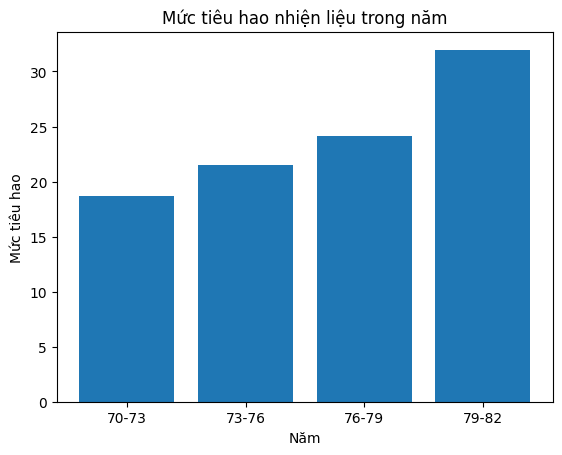

In [107]:

binmy = [70,73,76,79,82]
lablemy = ['70-73','73-76','76-79','79-82']
mpg_sql['fmodelyear'] = pd.cut(mpg_sql['model_year'],bins = binmy,labels=lablemy)
groupby_fuel_modelyear = mpg_sql.groupby('fmodelyear')['mpg'].mean()
plt.bar(groupby_fuel_modelyear.index,groupby_fuel_modelyear.values)
plt.xlabel('Năm')
plt.ylabel('Mức tiêu hao')
plt.title('Mức tiêu hao nhiện liệu trong năm')
plt.show()